## Data Science / Analytics Intern – Round-0 Assignment

## STEP 1: Load libraries & data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load datasets
sentiment = pd.read_csv("fear_greed_index.csv")
trades = pd.read_csv("historical_data.csv")

print("Sentiment data:")
display(sentiment.head())

print("Trader data:")
display(trades.head())


Sentiment data:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


Trader data:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


## STEP 2: Initial data inspection


In [3]:
print("Sentiment shape:", sentiment.shape)
print("Trades shape:", trades.shape)

print("\nMissing values (sentiment):")
print(sentiment.isnull().sum())

print("\nMissing values (trades):")
print(trades.isnull().sum())

print("\nDuplicate rows:")
print("Sentiment:", sentiment.duplicated().sum())
print("Trades:", trades.duplicated().sum())


Sentiment shape: (2644, 4)
Trades shape: (211224, 16)

Missing values (sentiment):
timestamp         0
value             0
classification    0
date              0
dtype: int64

Missing values (trades):
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

Duplicate rows:
Sentiment: 0
Trades: 0


### Observations
- The sentiment dataset contains 2,644 rows and 4 columns.
- The trader dataset contains 211,224 rows and 16 columns.
- No missing values were found in either dataset.
- No duplicate records were detected.
- Both datasets are clean and suitable for further analysis.


## STEP 3: Data cleaning (duplicates)

In [4]:
trades = trades.drop_duplicates()


## STEP 4: Date & timestamp conversion

In [7]:
# Convert sentiment date
sentiment['date'] = pd.to_datetime(sentiment['date'])

# Convert trader timestamp (DD-MM-YYYY HH:MM)
trades['Timestamp IST'] = pd.to_datetime(
    trades['Timestamp IST'],
    format='%d-%m-%Y %H:%M'
)

# Extract date
trades['date'] = trades['Timestamp IST'].dt.date
sentiment['date'] = sentiment['date'].dt.date

# Verify
display(sentiment.head())
display(trades[['Timestamp IST', 'date']].head())


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


,Timestamp IST,date
0,2024-12-02 22:50:00,2024-12-02
1,2024-12-02 22:50:00,2024-12-02
2,2024-12-02 22:50:00,2024-12-02
3,2024-12-02 22:50:00,2024-12-02
4,2024-12-02 22:50:00,2024-12-02


In [8]:
sentiment['sentiment_group'] = sentiment['classification'].apply(
    lambda x: 'Fear' if 'Fear' in x else 'Greed'
)

sentiment[['classification', 'sentiment_group']].head()


,classification,sentiment_group
0,Fear,Fear
1,Extreme Fear,Fear
2,Fear,Fear
3,Extreme Fear,Fear
4,Extreme Fear,Fear


## STEP 6: Merge datasets

In [9]:
merged = trades.merge(
    sentiment[['date', 'sentiment_group']],
    on='date',
    how='left'
)

print("Merged shape:", merged.shape)
merged.head()


Merged shape: (211224, 18)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,sentiment_group
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,Greed


## STEP 7: Feature engineering


In [10]:
merged['is_win'] = merged['Closed PnL'] > 0
merged['is_long'] = merged['Side'].str.upper() == 'BUY'
merged['trade_size_usd'] = merged['Size USD']


## STEP 8: Daily trader metrics

In [11]:
daily_trader = merged.groupby(
    ['date', 'Account', 'sentiment_group']
).agg(
    daily_pnl=('Closed PnL', 'sum'),
    trades=('Closed PnL', 'count'),
    win_rate=('is_win', 'mean'),
    avg_trade_size=('trade_size_usd', 'mean'),
    long_ratio=('is_long', 'mean')
).reset_index()

daily_trader.head()


,date,Account,sentiment_group,daily_pnl,trades,win_rate,avg_trade_size,long_ratio
0,2023-05-01,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,Greed,0.000000,3,0.000000,159.000000,1.000000
1,2023-12-05,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,Greed,0.000000,9,0.000000,5556.203333,0.777778
2,2023-12-14,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,Greed,-205.434737,11,0.363636,10291.213636,0.454545
3,2023-12-15,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,Greed,-24.632034,2,0.000000,5304.975000,1.000000
4,2023-12-16,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,Greed,0.000000,3,0.000000,5116.256667,1.000000


# PART B — ANALYSIS

## STEP 9: Fear vs Greed performance

In [12]:
performance_summary = daily_trader.groupby('sentiment_group').agg(
    avg_pnl=('daily_pnl', 'mean'),
    median_pnl=('daily_pnl', 'median'),
    avg_win_rate=('win_rate', 'mean'),
    avg_trades=('trades', 'mean')
)

performance_summary


,avg_pnl,median_pnl,avg_win_rate,avg_trades
sentiment_group,,,,
Fear,5185.146443,122.737038,0.357071,105.363291
Greed,3973.045974,243.343540,0.360969,82.568387


## STEP 9: PnL visualization

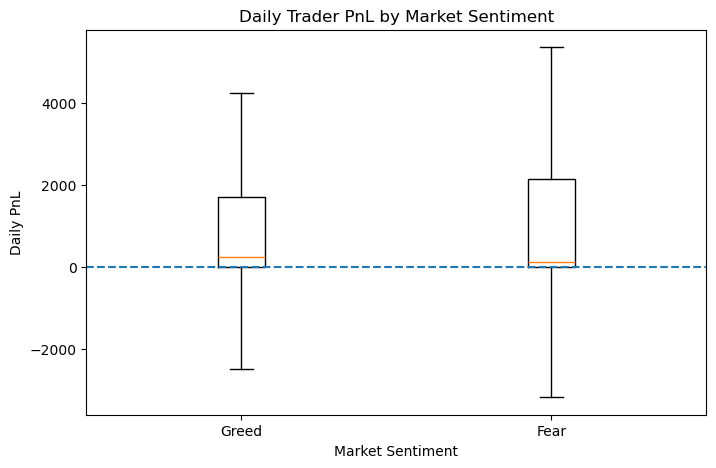

In [16]:
import matplotlib.pyplot as plt

groups = daily_trader['sentiment_group'].unique()
data = [daily_trader[daily_trader['sentiment_group'] == g]['daily_pnl'] for g in groups]

plt.figure(figsize=(8,5))
plt.boxplot(data, labels=groups, showfliers=False)
plt.axhline(0, linestyle='--')
plt.title("Daily Trader PnL by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Daily PnL")
plt.show()


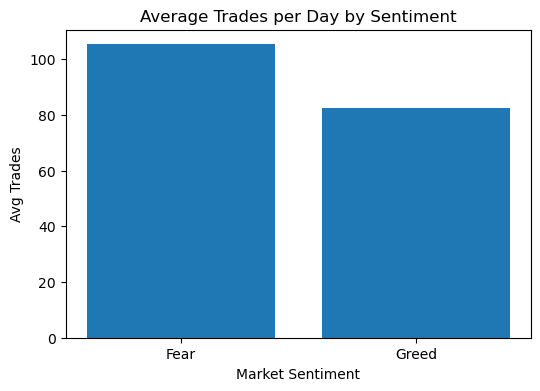

In [17]:
freq = daily_trader.groupby('sentiment_group')['trades'].mean()

plt.figure(figsize=(6,4))
plt.bar(freq.index, freq.values)
plt.title("Average Trades per Day by Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Avg Trades")
plt.show()


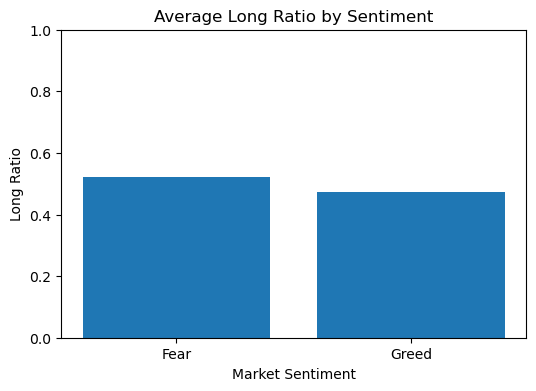

In [18]:
long_ratio = daily_trader.groupby('sentiment_group')['long_ratio'].mean()

plt.figure(figsize=(6,4))
plt.bar(long_ratio.index, long_ratio.values)
plt.title("Average Long Ratio by Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Long Ratio")
plt.ylim(0,1)
plt.show()
